# Linear algebra Crash Course (with Python) Class 2 

# Chap 2: 3d linear transformation

## Interactive figure
How is the interactive figure possible? It's because of the 3d linear transformation.

In [1]:
matplotlib

Using matplotlib backend: <object object at 0x000001EB9B8A7550>


In [2]:
matplotlib qt

In [3]:
matplotlib

Using matplotlib backend: QtAgg


In [4]:
import matplotlib.pyplot as plt

In [6]:
# Define the coordinates for the dinosaur shape
x = [6,3,1,-1,-2,-3,-4,-5,-5,-2,-5,-4,-2,-1,0,-1,1,2,1,3,5,6]
y = [4,1,2,5,5,4,4,3,2,2,1,0,1,0,-3,-4,-4,-3,-2,-1,1,4]
# Create a figure and axis
ax = plt.figure().add_subplot(projection='3d')

# Plot the dinosaur shape
ax.plot(x, y,zs=1, zdir='z', label='curve in (x, y)')  # Use 'green' for the line color
# Set the limits of the plot
ax.set_xlim(min(x) - 1, max(x) + 1)  # Adjust the x-axis limits
ax.set_ylim(min(y) - 1, max(y) + 1)  # Adjust the y-axis limits
ax.set_zlim( - 2, 2)
plt.gca().set_aspect('equal') #get current axes and set the aspect ratio

# Display the plot
plt.show()

In [7]:
import numpy as np

ax = plt.figure().add_subplot(projection='3d')

# Make the grid
x = np.zeros(3)
y = np.zeros(3)
z = np.zeros(3)


# Make the direction data for the arrows
u = [1,0,0]
v = [0,1,0]
w = [0,0,1]

ax.quiver(x, y, z, u, v, w, length=1, normalize=False)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.show()

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Make data
rows,cols =(10,10)

x1 =np.tile( np.linspace(-2, 2 , cols),(rows,1))
print(x1.shape)
y1 = x1.T
z1 = 2*x1 + y1

# Plot the surface

ax.plot_surface(x1, y1, z1)

#ax.quiver(x, y, z, u, v, w, length=1, normalize=False)

# Set an equal aspect ratio
ax.set_aspect('equal')

plt.show()

(10, 10)


Plane is a bit boring, let's try to put the dinasour on the plane.

In [12]:
# Define the coordinates for the dinosaur shape
x =np.array([6,3,1,-1,-2,-3,-4,-5,-5,-2,-5,-4,-2,-1,0,-1,1,2,1,3,5,6])
y = np.array([4,1,2,5,5,4,4,3,2,2,1,0,1,0,-3,-4,-4,-3,-2,-1,1,4])
#!!!!!!!!!!!
z = 2*x+y
#!!!!!!!!!!!

# Create a figure and axis
ax = plt.figure().add_subplot(projection='3d')

# Plot the dinosaur shape
ax.plot(x, y,z, zdir='z', label='dinosaur in projection')  
ax.plot(x, y,zs=0, zdir='z', color='green')  # Use 'green' for the line color

# Set the limits of the plot
ax.set_xlim(min(x) - 1, max(x) + 1)  # Adjust the x-axis limits
ax.set_ylim(min(y) - 1, max(y) + 1)  # Adjust the y-axis limits
ax.set_zlim( - 10, 10)
plt.gca().set_aspect('equal') #get current axes and set the aspect ratio

# Display the plot
plt.show()

This looks a bit funny. The prolonged dinasour is just looked like a shadow of the original dinasour. Could you measure the angle between the projected plane and the x-y plane?

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the function for a sphere
def sphere(radius, v, h):
    phi, theta = np.mgrid[0.0:2.0*np.pi:20j, 0.0:np.pi:10j]
    x = radius*np.cos(phi)*np.sin(theta) + v
    y = radius*np.sin(phi)*np.sin(theta) + h
    z = radius*np.cos(theta)
    return x, y, z

# Draw the eyes
x, y, z = sphere(0.2, 0.5, -0.5)
ax.plot_surface(x, y, z, color='b')
x, y, z = sphere(0.2, -0.5, -0.5)
ax.plot_surface(x, y, z, color='b')

# Draw the mouth
x = np.linspace(-1, 0, 100) 
y = 0.5*np.sin(x*np.pi) - 1.2
z = np.zeros_like(x)
ax.plot(x +0.5, y, z, 'r')
ax.set_aspect('equal')
plt.show()

Once again we want to fill the 3-d space with parallelepipedon by the vector $\mathbf{u}_1$,$\mathbf{u}_2$,$\mathbf{u}_3$. It is quite obivious that we could do that as long as $\mathbf{u}_1$,$\mathbf{u}_2$,$\mathbf{u}_3$ are linear independent.


Similiar to the 2d case, we could represent a vector in two different coordinate systems and use a matrix to connect them.

$$\begin{bmatrix}\mathbf{u}_1 & \mathbf{u}_2 & \mathbf{u}_3  \end{bmatrix}\begin{bmatrix} x \\ y \\ z \end{bmatrix}_{\mathbf{u}_1,\mathbf{u}_2,\mathbf{u}_3 }= \begin{bmatrix} \alpha \\ \beta \\ \gamma \end{bmatrix}_{\mathbf{e}_1,\mathbf{e}_2,\mathbf{e}_3 }$$
which naturally relate to the equation.

$$\mathbf{M}\mathbf{x}=\vec{\mathbf{\alpha}}$$

where $$\mathbf{M}= \begin{bmatrix}\mathbf{u}_1 & \mathbf{u}_2 & \mathbf{u}_3 \end{bmatrix}$$ 

On the other hand, you can see $\mathbf{M}$ a linear map sending $\mathbf{e}_1$ to $\mathbf{u}_1$, sending $\mathbf{e}_2$ to $\mathbf{u}_2$,  sending $\mathbf{e}_3$ to $\mathbf{u}_3$. In this way, we can stay in the same cartesian coordinates. Both views have their pros and cons, and be ready to swtich if necessary.


***exercise: $\mathbf{v}_1,\mathbf{v}_2,\mathbf{v}_3$ are 3-dimensional column vectors. Let $\mathbf{V}=\begin{bmatrix}\mathbf{v}_1 & \mathbf{v}_2 & \mathbf{v}_3 \end{bmatrix}$ and $\mathbf{D}=\begin{bmatrix}d_1 & 0 & 0 \\0 & d_2 & 0 \\0 &0 & d_3 \end{bmatrix}$. Compute $\mathbf{V}\mathbf{D}$ and $\mathbf{D} \mathbf{V}^{\top}$ in terms of $\mathbf{v}_1,\mathbf{v}_2,\mathbf{v}_3$***

***练习：我们有三个三维列向量 $\mathbf{v}_1,\mathbf{v}_2,\mathbf{v}_3$,将其并排在一起得到一个3x3的矩阵 $\mathbf{V}$，另外我们有3x3对角线矩阵 $\mathbf{D}$ 。计算 $\mathbf{V}\mathbf{D}$与 $\mathbf{D} \mathbf{V}^{\top}$,并用 $\mathbf{v}_1,\mathbf{v}_2,\mathbf{v}_3$ 表示其计算结果。***

***exercise: compute the following,***  
(1).$\begin{pmatrix}3&-2&1 \\ 1 &-1&2\end{pmatrix}\begin{pmatrix}-1&5\\-2&4\\3&-1 \end{pmatrix}
$
(2).$\begin{pmatrix}3&1&2&-1 \\ 0 &3&1&0 \\1&0&1&0 \end{pmatrix}\begin{pmatrix}0&5\\2&0\\0&-1\\-3&0 \end{pmatrix}
$
(3).$\begin{pmatrix}1 \\ 2 \\ 3 \\ 4\end{pmatrix}\begin{pmatrix}4&3&2&1 \end{pmatrix}
$  
(4).$\begin{pmatrix}4&3&2&1 \end{pmatrix}\begin{pmatrix}1 \\ 2 \\ 3 \\ 4\end{pmatrix}
$
(5).$\begin{pmatrix}0&-1&0 \\ 1 &0&1 \\ 0 &1&0 \end{pmatrix}^4
$
(6).$\begin{pmatrix}2&1&0 \\ 0 &2&1 \\ 0 &0&2 \end{pmatrix}^4
$
(7).$\begin{pmatrix}a&0&0 \\ 0&b&0 \\ 0 &0&c \end{pmatrix}^n
$
(8).$\begin{pmatrix}1&1 \\ 1 &1 \end{pmatrix}^n
$

2d linear transformation is a degenerated case for 3d linear transformation as you could embeded a 2d linear transformation into 3d linear transformation in this way.

$$\mathbf{M}=\begin{bmatrix}a & b & 0 \\c & d & 0 \\0 &0 &0 \end{bmatrix}$$

### Determinant

The determinant of a 3 by 3 matrix $\mathbf{M}=\begin{bmatrix}\mathbf{u}_1&\mathbf{u}_2&\mathbf{u}_3\end{bmatrix}=\begin{bmatrix}a & d & g \\b & e & h \\c &f &m \end{bmatrix}$:

$$\mathtt{det}(\mathbf{M})\stackrel{\triangle}= aem+bfg+cdh-afh-bdm-ceg$$

$$\begin{align*}
\mathtt{det}(\mathbf{M}) &= aem+bfg+cdh-afh-bdm-ceg \\
 &=a(em -fh) +b(fg-dm)+c(dh-eg) \\
 &=a \cdot\mathtt{det}(\begin{bmatrix}e & f\\h&m \end{bmatrix})+b \cdot \mathtt{det}(\begin{bmatrix}f & d\\m&g \end{bmatrix})+c \cdot \mathtt{det}(\begin{bmatrix}d & e\\g&h \end{bmatrix})\\
 &= \begin{bmatrix}a\\b\\c \end{bmatrix}\cdot(\begin{bmatrix}d\\e\\f \end{bmatrix}\wedge \begin{bmatrix}g\\h\\m \end{bmatrix} )= \mathbf{u}_1 \cdot(\mathbf{u}_2 \wedge \mathbf{u}_3) 
\end{align*}
$$

In [1]:
import sympy as sp
a,b,c,d,e,f,g,h,m = sp.symbols("a,b,c,d,e,f,g,h,m",real=True)

In [16]:
M=sp.Matrix([[a,b,c],[d,e,f],[g,h,m]])
M.det()

a*e*m - a*f*h - b*d*m + b*f*g + c*d*h - c*e*g

In [19]:
M.T.det()

a*e*m - a*f*h - b*d*m + b*f*g + c*d*h - c*e*g

In [20]:
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

u1= a*N.i+b*N.j + c*N.k
u2= d*N.i+e*N.j + f*N.k
u3= g*N.i+h*N.j + m*N.k
print(u1 & (u2.cross(u3)))
print(u1.dot(u2.cross(u3)))            

a*(e*m - f*h) + b*(-d*m + f*g) + c*(d*h - e*g)
a*(e*m - f*h) + b*(-d*m + f*g) + c*(d*h - e*g)


### Determinant and Volume
In 3 dimensional world, $\mathbf{u}_2 \wedge \mathbf{u}_3$ is a vector perpendicular to the plane spanned by $\mathbf{u}_2 $ and $ \mathbf{u}_3$ and has the length of $\mathtt{sin} \theta |\mathbf{u}_2||\mathbf{u}_3|$ ={ area of parallelogram made by the vectors: $\vec{\mathbf{0}},\mathbf{u}_2 ,\mathbf{u}_3,\mathbf{u}_2 +\mathbf{u}_3 $}. Therefore by the definition of volume, $\mathtt{det}(M)=\mathbf{u}_1 \cdot(\mathbf{u}_2 \wedge \mathbf{u}_3)  = $ volume of parallelepipedon made by the vectors: $\vec{\mathbf{0}},\mathbf{u}_1 ,\mathbf{u}_2,\mathbf{u}_3,\mathbf{u}_1 +\mathbf{u}_2,\mathbf{u}_1 +\mathbf{u}_3,\mathbf{u}_2 +\mathbf{u}_3,\mathbf{u}_1 +\mathbf{u}_2+\mathbf{u}_3 $.


**exercise: $\mathbf{M}$  is a 3 by 3 matrix. Prove the following: if and only if $det(\mathbf{M})=0$, there exist a non-zero 3 dimensional vector $\mathbf{v}$ such that $\mathbf{M}\mathbf{v}=0$**

### Inverse Matrix
 $\mathbf{N}_{ij}$ is the determinant of the 2 by 2  matrix obtained from $\mathbf{M}$ by removing the 𝑖-th row and the 𝑗-th column.  $\mathbf{C}_{ij} = (-1)^{i+j} \mathbf{N}_{ij}$ 


$$\mathbf{M}^{-1}= \frac{1}{\mathtt{det}(\mathbf{M})}\begin{bmatrix}\mathbf{C}_{11}&\mathbf{C}_{12}&\mathbf{C}_{13}\\ \mathbf{C}_{21}&\mathbf{C}_{22}&\mathbf{C}_{23}\\ \mathbf{C}_{31}&\mathbf{C}_{32}&\mathbf{C}_{33} \end{bmatrix}^{\top}$$


In [49]:
(M.det())*M.inv()


Matrix([
[ e*m - f*h, -b*m + c*h,  b*f - c*e],
[-d*m + f*g,  a*m - c*g, -a*f + c*d],
[ d*h - e*g, -a*h + b*g,  a*e - b*d]])

### Charasteristic equation, Eigenvalue, and Eigenvector

Charasteristic equation of $n$ by $n$ square matrix $\mathbf{M}$ is defined as $\mathtt{det}(\mathbf{M}-\lambda \mathbf{I})=0$ as a equation of $\lambda$. $\mathbf{I}$ is the diagonal identity matrix.
- It's obivious that the degree of the Charasteristic equation is equal to $n$.(with some mathematical induction on the determinants) With fundermental theorem of algebra, we know it has $n$ complex roots.

Eigenvalue of $\mathbf{M}$ is defined as the roots of its eigenfunction. We write it down as $\{\lambda_{i}\}$. Because the existence of mutiple roots, $|\{\lambda_{i}\}|\leq n$.

Since $\mathtt{det}(\mathbf{M}-\lambda_i \mathbf{I})=0$, in 2 or 3 dimension, we know for every $\lambda_i$ there exists a eigenvector $\mathbf{v}_i$ such that $(\mathbf{M}-\lambda_i \mathbf{I})\mathbf{v}_i=0$. The statement is also true for general $n$ and we will discuss it again later in this course.

By linearity, $\mathbf{M}\mathbf{v}_i=\lambda_i \mathbf{I}\mathbf{v}_i= \lambda_i \mathbf{v}_i$







Collecting all the eigenvectors $\{\mathbf{v}_i\}$ as $\mathbf{V}=[\mathbf{v}_1,\dots,\mathbf{v}_m]$, $m\leq n$.

We have $\mathbf{MV}= \mathbf{VD}$, $\mathbf{D}$ is a diagonal matrix with diagonal terms as  $\lambda_i$. 

If we are lucky, $n=m$ and $\mathbf{V}$ is invertible. We have $\mathbf{M}= \mathbf{VDV}^{-1}$.

### Examples 
Let's try to compute several examples:

First, let's consider $\mathbf{M} =\begin{bmatrix}1 & 0 & 0 \\0 & 1 & 0 \\0 &0 &1 \end{bmatrix}$ 

Obiviously $\mathtt{det}(\mathbf{M}-\lambda \mathbf{I})=-(\lambda -1)^3$. $\lambda_1=1$, We can also see that $\mathbf{M}\mathbf{v}=\mathbf{v} ,\forall \mathbf{u} \in \mathbb{R}^3$

Next, let's consider $\mathbf{M} =\begin{bmatrix}a & 0 & 0 \\0 & b & 0 \\0 &0 &c \end{bmatrix}$
, then $\mathtt{det}(\mathbf{M}-\lambda \mathbf{I})=-(\lambda -a)(\lambda -b)(\lambda -c)$. $\lambda_1=a$,$\lambda_2=b$,$\lambda_3=c$, $\mathbf{v}_1 = \begin{bmatrix}1 \\0 \\0\end{bmatrix}$,$\mathbf{v}_2 = \begin{bmatrix}0 \\1 \\0\end{bmatrix}$,$\mathbf{v}_3 = \begin{bmatrix}0 \\0 \\1\end{bmatrix}$ 

Now, let's consider $\mathbf{M} =\begin{bmatrix}0 & 0 & 0 \\1 & 0 & 0 \\0 &1 &0 \end{bmatrix}$, then $\mathtt{det}(\mathbf{M}-\lambda \mathbf{I})=-\lambda^3$. $\lambda_1=0$, $\mathbf{v}_1= \begin{bmatrix}0 \\0 \\1\end{bmatrix}$, and we don't have any other eigenvector.

For roataional matrix:

In [2]:
alpha, beta,theta, x1,y1,lambda1 = sp.symbols('alpha, beta,theta, x1,y1,lambda1',real=True)
A = sp.Matrix([[sp.cos(alpha),-sp.sin(alpha)],[sp.sin(alpha),sp.cos(alpha)]])
B = sp.Matrix([[sp.cos(alpha),-sp.sin(alpha),0],[sp.sin(alpha),sp.cos(alpha),0],[0,0,1]])
C = sp.Matrix([[1,0,0],[0,sp.cos(theta),-sp.sin(theta)],[0,sp.sin(theta),sp.cos(theta)]])

v = sp.Matrix([x1,y1])
A = A- lambda1 *sp.eye(2)

In [3]:
A

Matrix([
[-lambda1 + cos(alpha),           -sin(alpha)],
[           sin(alpha), -lambda1 + cos(alpha)]])

In [163]:
A.det()

lambda1**2 - 2*lambda1*cos(alpha) + sin(alpha)**2 + cos(alpha)**2

In [164]:
sp.Matrix(sp.solve(sp.Matrix(A).det(),lambda1 ))

Matrix([
[exp(-I*alpha)],
[ exp(I*alpha)]])

In [169]:
sp.Matrix(B*C)

Matrix([
[cos(alpha), -sin(alpha)*cos(theta),  sin(alpha)*sin(theta)],
[sin(alpha),  cos(alpha)*cos(theta), -sin(theta)*cos(alpha)],
[         0,             sin(theta),             cos(theta)]])

In [170]:
(B*C- lambda1 *sp.eye(3)).det()

-lambda1**3 + lambda1**2*cos(alpha)*cos(theta) + lambda1**2*cos(alpha) + lambda1**2*cos(theta) - lambda1*sin(alpha)**2*cos(theta) - lambda1*sin(theta)**2*cos(alpha) - lambda1*cos(alpha)**2*cos(theta) - lambda1*cos(alpha)*cos(theta)**2 - lambda1*cos(alpha)*cos(theta) + sin(alpha)**2*sin(theta)**2 + sin(alpha)**2*cos(theta)**2 + sin(theta)**2*cos(alpha)**2 + cos(alpha)**2*cos(theta)**2

In [171]:
sp.simplify((B*C- lambda1 *sp.eye(3)).det())

-lambda1**3 + lambda1**2*cos(alpha)*cos(theta) + lambda1**2*cos(alpha) + lambda1**2*cos(theta) - lambda1*cos(alpha)*cos(theta) - lambda1*cos(alpha) - lambda1*cos(theta) + 1

In [172]:
expr = sp.simplify((B*C- lambda1 *sp.eye(3)).det()/(1-lambda1))
sp.simplify((B*C- lambda1 *sp.eye(3)).det()/(1-lambda1))

lambda1**2 - lambda1*cos(alpha)*cos(theta) - lambda1*cos(alpha) - lambda1*cos(theta) + lambda1 + 1

let $\beta=-\cos{\left(\alpha \right)}\cos{\left(\theta \right)} -\cos{\left(\alpha \right)} - \cos{\left(\theta \right)} + 1$= $2-(1-\cos{\left(\alpha \right)})(1-\cos{\left(\theta \right)})$

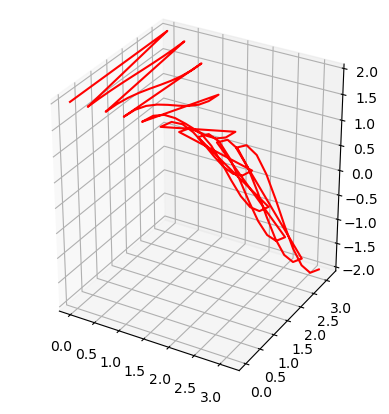

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

alpha1, theta1 = np.mgrid[0.0:np.pi:10j, 0.0:np.pi:10j]

z = 2-(1-np.cos(alpha1))*(1-np.cos(theta1))
alpha1 = alpha1.flatten()
theta1 = theta1.ravel()
z= z.ravel()


ax.plot(alpha1, theta1, z, 'r')
ax.set_aspect('equal')
plt.show()

***exercise: change the plot z = 2-(1-np.cos(alpha1))*(1-np.cos(theta1)), range:[0,pi]X[0,pi] into surface plot***

In [173]:
sp.solve(lambda1**2 +beta*lambda1 +1,lambda1)

[-beta/2 - sqrt(beta**2 - 4)/2, -beta/2 + sqrt(beta**2 - 4)/2]

Notice that $|\beta|\leq 2$, therefore $\beta^2-4\leq 0$. Therefore, by the formula of quadratic equation the roots of this equation is conjugated with norm 1.

Therefore, we gave the idea how to prove Euler’s fixed point theorem  which states that any motion of a rigid body on the surface of a sphere may be represented as a *rotation about an appropriately chosen rotation pole*, called an Euler pole. Geologists have used this theorem to understand the motions of tectonic plates.

In [174]:
expr = (B*C- lambda1 *sp.eye(3)).det() /(lambda1-1)

In [175]:
sp.simplify(sp.Matrix(sp.solve(sp.simplify((B*C- lambda1 *sp.eye(3)).det()),lambda1 )))

Matrix([
[                                                                                                                                                                                               1],
[-sqrt(sin(alpha)**2*sin(theta)**2 - 2*sin(alpha)**2*cos(theta) - 2*sin(alpha)**2 - 2*sin(theta)**2*cos(alpha) - 2*sin(theta)**2)/2 + cos(alpha)*cos(theta)/2 + cos(alpha)/2 + cos(theta)/2 - 1/2],
[ sqrt(sin(alpha)**2*sin(theta)**2 - 2*sin(alpha)**2*cos(theta) - 2*sin(alpha)**2 - 2*sin(theta)**2*cos(alpha) - 2*sin(theta)**2)/2 + cos(alpha)*cos(theta)/2 + cos(alpha)/2 + cos(theta)/2 - 1/2]])

***exercise compute the eigenfunction of ***

### Orthogonal matrix

We should elaborate a little bit more on orthogonal(orthonormal) matrices. The definition of  an orthogonal square matrix  $\mathbf{U}$ is that $\mathbf{U}\mathbf{U}^\top =\mathbf{I}$. Roataional matrices are typical examples for orthgonal matrix. exercise

In [4]:
B

Matrix([
[cos(alpha), -sin(alpha), 0],
[sin(alpha),  cos(alpha), 0],
[         0,           0, 1]])

In [5]:
C

Matrix([
[1,          0,           0],
[0, cos(theta), -sin(theta)],
[0, sin(theta),  cos(theta)]])

In [6]:
sp.Matrix(sp.simplify(C*sp.transpose(C)))

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [178]:
sp.Matrix(sp.simplify(B*C*sp.transpose(C)*sp.transpose(B)))

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [179]:
sp.Matrix(sp.simplify(B*C*sp.transpose(B*C)))

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

#### Orthogonal matrix conserve length and angle

It is obvious that given any 2 vectors with the same dimension, we have $\langle \mathbf{x},\mathbf{y}\rangle = \mathbf{x}^\top \mathbf{y}$. Therefore for any square matrix $\mathbf{M}$ with suitable dimensions(what are them?), $\langle \mathbf{x},\mathbf{M}\mathbf{y}\rangle = \mathbf{x}^\top \mathbf{M}\mathbf{y}= \mathbf{x}^\top \mathbf{M}^{\top\top}\mathbf{y}= (\mathbf{M}^{\top}\mathbf{x})^{\top}\mathbf{y}= \langle \mathbf{M}^{\top}\mathbf{x},\mathbf{y}\rangle$.

Then for any orthogonal matrix $\mathbf{U}$, $\langle \mathbf{U}\mathbf{x},\mathbf{U}\mathbf{y}\rangle =\langle \mathbf{U}^\top\mathbf{U}\mathbf{x},\mathbf{y}\rangle = \langle \mathbf{x},\mathbf{y}\rangle = |\mathbf{x}||\mathbf{y}|\mathtt{sin}\theta$. Let $\mathbf{x}=\mathbf{y}$, we have $\langle \mathbf{U}\mathbf{x},\mathbf{U}\mathbf{x}\rangle= |\mathbf{x}|^2$. Therefore we could say that orthogonal matrix is similiar to rigid motion which doesn't change their intrinsic relationship.



In [ ]:
*exercise?: prove that any orthogonal matrix is a combination of rotations and reflections*

Conversely, if a finite dimensional matrix conserve length for all vector. Is it a orthogonal matrix?

Suppose $\langle \mathbf{V}\mathbf{x},\mathbf{V}\mathbf{x}\rangle = \langle \mathbf{x},\mathbf{x}\rangle, \forall \mathbf{x}$, $\langle \mathbf{V}(\mathbf{x}+\mathbf{y}),\mathbf{V}(\mathbf{x}+\mathbf{y})\rangle = \langle \mathbf{V}\mathbf{x},\mathbf{V}\mathbf{x}\rangle +2\langle \mathbf{V}\mathbf{x},\mathbf{V}\mathbf{y}\rangle+\langle \mathbf{V}\mathbf{y},\mathbf{V}\mathbf{y}\rangle$
$\langle \mathbf{x}+\mathbf{y},\mathbf{x}+\mathbf{y}\rangle = \langle \mathbf{x},\mathbf{x}\rangle +2\langle \mathbf{x},\mathbf{y}\rangle+ \langle \mathbf{y},\mathbf{y}\rangle$, $\Rightarrow \langle \mathbf{x},\mathbf{y}\rangle =\langle \mathbf{V}\mathbf{x},\mathbf{V}\mathbf{y}\rangle,\forall \mathbf{x}, \mathbf{y} \Rightarrow \langle \mathbf{x},\mathbf{y}\rangle =\langle \mathbf{x},\mathbf{V}^{\top}\mathbf{V}\mathbf{y}\rangle,\forall \mathbf{x}, \mathbf{y}$
With duality theory(check Lax textbook), we could view $\langle \cdot,\mathbf{y}\rangle$ as a induced linear function. Under the condition of finite dimensions, $\mathbf{y} = \mathbf{V}^{\top}\mathbf{V}\mathbf{y}, \forall \mathbf{y}$, Therefore $\mathbf{V}^{\top}\mathbf{V} = \mathbf{I}$ and $\mathbf{V}$ is orthogonal.

```
The essence of man is no abstraction inherent in each single individual. In reality, it is the ensemble of the social relations.  --- 
```